2 - Como você extrairia informações de medicamentos, exames e doenças do paciente? 
Analise os dados que tem em mãos e descreva o pipeline de desenvolvimento para um modelo como esses, 
levando em consideração todo o processo de análise, anotação, treino até a validação do modelo. 

BERT

No problema em questão podemos utilizar um fluxo análogo ao apresentado em [1], em que um modelo tradicional é treinado para identificar entidades nomeadas (Named Entities Recognition) em textos clinicos em português. Assim como realizado nos experimentos descritos no trabalho, um ajuste-fino (re-treinamento de toda a rede), ou transfer-learning (re-treinamente do final da rede, parte em que as inferências são realizadas). 

Primeiro, precisamos rotular os dados, identificando em cada texto os medicamentos, exames e doenças. A seguir, é necessária a separação dos dados entre dados de treinamento, teste e validação. Existem diversas aborgagens possível. Devido ao custo computacional de treinamento, é recomendável aplicar o hold-out, em que o dataset é separado em diversas partes, por exemplo, 70% para treinamento, 15% para validação, 15% para teste. É imporante também, manter a mesma proporção de idades,sexo na separação do dataset.   Ainda no contexto de preparação dos dados técnicas de data augmentaion podem ser aplicadas nos dados de treinamento.

Após, a separação dos dados que serão utilizados para treinar a rede neural por tantas épocas quanto for possível, e enquanto a função de custo nos dados de validação estiver decaindo. Uma técnica comumente utilizada no treinamento, é o early stopping, em que o treinamento é parada caso não haja mudança da função de perda durante N épocas.

Após o treinamento, é importante avaliar, a acurácia, precisão e recall para cada classe. Além disso, diante da necessidade de negócio, ou do objetivo específico do modelo é possível ajustar o que é considerado positivo ou negativo escolhendo o threshold mais apropriado para evitar falsos negativos, ou falsos positivos. Por exemplo, no caso de problemas médicas, pode ser preferível evitar os Falsos Positivos, portanto, a precisão deveria ser priorizada

PRECISAO= TP/(TP+FP)
RECALL=TP/(TP+FN)


[1]Rubel Schneider, Elisa Terumi, et al. "BioBERTpt: a Portuguese neural language model for clinical named entity recognition." Proceedings of the 3rd Clinical Natural Language Processing Workshop. 19 November 2020, 2020.

In [22]:
import pandas as pd
from transformers import pipeline


/home/estevanmendes/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-11-09 15:19:32.243354: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-09 15:19:34.344460: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-09 15:19:38.945540: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find

In [ ]:

# NER_pipeline = pipeline("ner", model="pucpr/clinicalnerpt-disease",device='cpu')
# NER_pipeline = pipeline("ner", model="pucpr/clinicalnerpt-disease")
# NER_pipeline = pipeline("ner", model="pucpr/biobertpt-clin",device='cpu')
NER_pipeline = pipeline("ner", model="pucpr/biobertpt-all",device='cpu')


/home/estevanmendes/.local/lib/python3.8/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [ ]:
path='df_processed_sample_size_100.csv'
df_processed = pd.read_csv(path)

Abaixo fica evidenciado a necessidade de uma ajust-fino, ou transfer-learning, diante do resultado pouco eficaz.

In [ ]:
NER_pipeline(df_processed['text'][0])

[{'entity': 'LABEL_1',
  'score': 0.51752204,
  'index': 1,
  'word': '<',
  'start': 0,
  'end': 1},
 {'entity': 'LABEL_0',
  'score': 0.5656684,
  'index': 2,
  'word': 'html',
  'start': 1,
  'end': 5},
 {'entity': 'LABEL_1',
  'score': 0.60078204,
  'index': 3,
  'word': 'tas',
  'start': 6,
  'end': 9},
 {'entity': 'LABEL_1',
  'score': 0.55004036,
  'index': 4,
  'word': '##y',
  'start': 9,
  'end': 10},
 {'entity': 'LABEL_1',
  'score': 0.55783796,
  'index': 5,
  'word': '=',
  'start': 10,
  'end': 11},
 {'entity': 'LABEL_1',
  'score': 0.62024945,
  'index': 6,
  'word': '"',
  'start': 11,
  'end': 12},
 {'entity': 'LABEL_0',
  'score': 0.5026486,
  'index': 7,
  'word': 'html',
  'start': 12,
  'end': 16},
 {'entity': 'LABEL_1',
  'score': 0.6164874,
  'index': 8,
  'word': '##5',
  'start': 16,
  'end': 17},
 {'entity': 'LABEL_1',
  'score': 0.60356396,
  'index': 9,
  'word': '"',
  'start': 17,
  'end': 18},
 {'entity': 'LABEL_0',
  'score': 0.578929,
  'index': 10,
  '

LLM

Assim como demonstrado abaixo, a estruturação desses dados pode ser feita com o auxílio de LLMs. Técnicas como few-shots podem ser empregadas afim de melhorar a extração de informação. 
Ancorado em [2] e [3], seria ideal fazer um finetunning de um LLM para para extrair esses dados. Ainda no contexto de extração de informação, a saída do LLM pode ser feita na forma semi-estruturada(Json), facilitando o processo.

[2]Dagdelen, John, et al. "Structured information extraction from scientific text with large language models." Nature Communications 15.1 (2024): 1418.

[3]Wiest, Isabella Catharina, et al. "LLM-AIx: An open source pipeline for Information Extraction from unstructured medical text based on privacy preserving Large Language Models." medRxiv (2024).


Para o finetunning de um LLM da openai, precisa-se anotar um conjunto de amostras indicando a informação e role, tal qual indicado abaixo. 
{"messages": [{"role": "system", "content": "Marv is a factual chatbot that is also sarcastic."}, {"role": "user", "content": "What's the capital of France?"}, {"role": "assistant", "content": "Paris, as if everyone doesn't know that already."}]}

As amostras podem devem ser separadas, idealmente, mantendo a proporção

Para availiação dos modelos, pode-se utilizar tanto a definição exposta em [1], quanto uma generalização dos conceitos de precisão e recall.

Acurácia= quantidade de acertos

Precisao= quantidade de acertos dado que o ground truth não é vazio, e a predição do LLM não é vazia. 

Recall= quantidade de acertos dado que o ground truth não é vazio

Dentro do processo de ajuste de hiperparâmetros, a seleção do melhor prompt pode ser realizada por meio de diversas técnicas, entre elas, a priorização de uma das métricas citadas anteriormente.

In [1]:
import pandas as pd
import pydantic
from typing import List
from dotenv import load_dotenv
import os
from openai import OpenAI
import json

load_dotenv()


True

In [2]:
path='df_processed_sample_size_100.csv'
df_processed = pd.read_csv(path)

Estrutura do json extraido pelo LLM

In [3]:

class Medicamento(pydantic.BaseModel):
    nome: str

class exame(pydantic.BaseModel):
    nome: str

class doencas(pydantic.BaseModel):
    nome: str


class Medical_info(pydantic.BaseModel):


    medicamento: List[Medicamento]
    exame: List[exame]
    doencas: List[doencas]
    


In [4]:

def openai_chat_json_schema(prompt,text,model="gpt-4o-mini-2024-07-18",json_model=None)->str:
    api_key=os.getenv('OPENAI_API_KEY')
    client=OpenAI(api_key=api_key)
    messages=[
              {
                "role": "system",
                "content": [
                  {
                    "type": "text",
                    "text": prompt
                  }
                ]
              },
              {
                "role": "user",
                "content": [
                  {
                    "type": "text",
                    "text": text
                  }
                ]
              }
            ]
    if json_model is not None:
          response_format={
           'type': 'json_schema',
           'json_schema': 
              {
                "name":"whocares", 
                "schema": json_model.model_json_schema()
              }
         } 
    else:
        response_format={
            "type": "json_object"
        }
    response=client.beta.chat.completions.parse(
        model=model,
        messages=messages,
        temperature=0,
        max_tokens=1002,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0,
        response_format=response_format
    )
    content=response.choices[0].message.content
    return content


In [5]:
prompt="""Sou uma IA que analisa documentos médicos a fim de extrair informações de prontuários médicos.
        retorno as informações sempre em json. 
        A partir do texto seguir, levando em consideração, a idade e sexo do paciente retorno as informações de medicamentos, exames e doenças.
        Exemplo de texto:
        "Paciente do sexo feminino, 25 anos, faz uso de anticoncepcional, e dipirona,  e tem histórico de hipertensão. Realizou exame de sangue e urina recentemente. Diagnóstico de infecção urinária"
        {"medicamento":[{"nome":"anticoncepcional"},{"nome":"dipirona"}],"exame":[{"nome":"sangue"},{"nome":"urina"}],"doencas":[{"nome":"hipertensão"},{"nome":"infecção urinária"}]}
        
        """

In [6]:
def customize_text(sex,age,text):
    custom_text=f"Paciente do sexo {sex} e {age} anos,prontuário: {text}"
    return custom_text

def extract_medical_info(age,sex,text:str,prompt)->dict:
    customized_text=customize_text(sex,age,text)
    response=openai_chat_json_schema(prompt,customized_text, json_model=Medical_info)
    return response


In [7]:
openai_chat_json_schema(prompt,
                        "Paciente do sexo feminino, 25 anos, faz uso de anticoncepcional, e dipirona,  e tem histórico de hipertensão. Realizou exame de sangue e urina recentemente. Diagnóstico de infecção urinária",
                        json_model=Medical_info)

'{"medicamento":[{"nome":"anticoncepcional"},{"nome":"dipirona"}],"exame":[{"nome":"sangue"},{"nome":"urina"}],"doencas":[{"nome":"hipertensão"},{"nome":"infecção urinária"}]}'

In [8]:
df_processed['raw_response_gpt4omin']=df_processed.apply(lambda x: extract_medical_info(x['sex'],x['age'],x['plain_text'],prompt),axis=1)

In [9]:
df_processed['medicamentos']=df_processed['raw_response_gpt4omin'].apply(lambda x: json.loads(x)['medicamento'])
df_processed['exames']=df_processed['raw_response_gpt4omin'].apply(lambda x: json.loads(x)['exame'])
df_processed['doencas']=df_processed['raw_response_gpt4omin'].apply(lambda x: json.loads(x)['doencas'])

In [10]:
df_processed.to_csv('df_processed_sample_size_100.csv',index=False)

In [11]:
df_processed['nome_medicamentos']=df_processed['medicamentos'].apply(lambda x: [i['nome'] for i in x])
df_processed['nome_exames']=df_processed['exames'].apply(lambda x: [i['nome'] for i in x])
df_processed['nome_doencas']=df_processed['doencas'].apply(lambda x: [i['nome'] for i in x])


<Axes: >

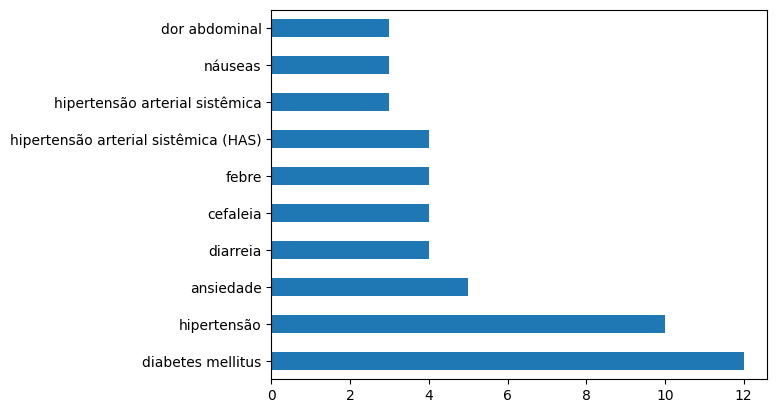

In [12]:
df_processed['nome_doencas'].explode().value_counts().nlargest(10).plot(kind='barh')

<Axes: >

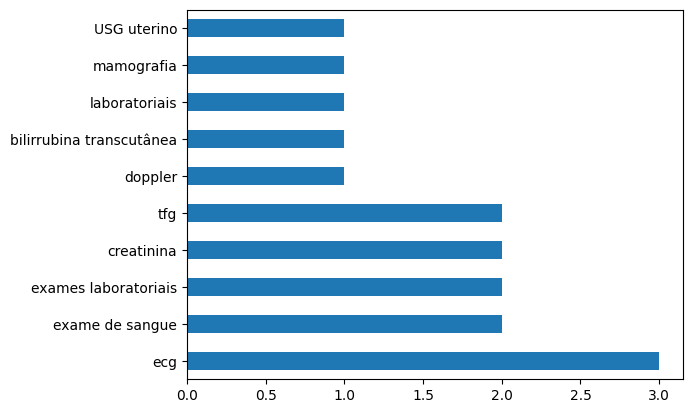

In [13]:
df_processed['nome_exames'].explode().value_counts().nlargest(10).plot(kind='barh')

<Axes: >

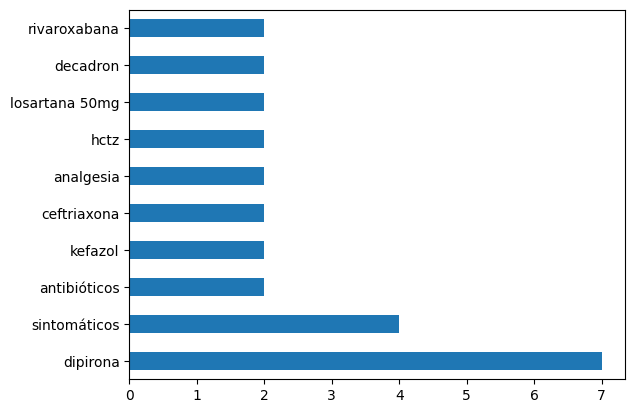

In [14]:
df_processed['nome_medicamentos'].explode().value_counts().nlargest(10).plot(kind='barh')

3 - Se fizesse as extrações via prompt, que tipo de prompt você usaria para extrair informações desses documentos médicos? Mostre exemplos.

Outras técnicas avançadas como meta-prompt e otimização de prompt [4] podem ser utilizadas. 

[4]Levi, Elad, Eli Brosh, and Matan Friedmann. "Intent-based Prompt Calibration: Enhancing prompt optimization with synthetic boundary cases." arXiv preprint arXiv:2402.03099 (2024).

In [15]:
prompt="""Sabendo que o texto a seguir é de origem médica realize as seguintes etapas:
        1- analise o texto, 
        2 - sintetize o texto em 3 tópicos, ou palavras chaves
        3- retorne um json da seguinte forma:{"topicos":["topic1","topic2","topic3"]}
        4- caso o texto seja ruidoso e não apresente informações claras e objetivas, retorne um json vazio {"topicos":["","",""]}"""    

In [16]:
prompt="""Sou uma IA que analisa documentos médicos a fim de extrair informações de prontuários médicos.
        retorno as informações sempre em json. 
        A partir do texto seguir, levando em consideração, a idade e sexo do paciente retorno as informações de medicamentos, exames e doenças.
        Exemplo de texto:
        "Paciente do sexo feminino, 25 anos, faz uso de anticoncepcional, e dipirona,  e tem histórico de hipertensão. Realizou exame de sangue e urina recentemente. Diagnóstico de infecção urinária"
        {"medicamento":[{"nome":"anticoncepcional"},{"nome":"dipirona"}],"exame":[{"nome":"sangue"},{"nome":"urina"}],"doencas":[{"nome":"hipertensão"},{"nome":"infecção urinária"}]}
        
        """

Os mesmos prompts podem ser feitos em inglês, visto que os dados de treinamento dos LLMs estão majoritariamente em inglês. Portanto, algumas atividades tem melhores resultados com o prompt em inglês. Contudo, é preciso avaliar se existe perda de exatidão ao se traduzir os prompts. 